In [ ]:
#!/usr/bin/env python
# coding: utf-8
# In[1]:

In [3]:
import pandas as pd
import numpy as np
import math
import statistics
import matplotlib.pyplot as plt
import zipfile
from datetime import datetime
from scipy import stats
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.style.use('ggplot')

# # Part I. 基本資料前置作業

In [5]:
# In[203]:
data = pd.read_csv('TXF1-分鐘-成交價.txt')
data.head()
#之後必須把inex從123換成Date(index沒辦法對照資料)

,Date,Time,Open,High,Low,Close,TotalVolume
0,2000/1/4,09:01:00,8688.0,8688.0,8676.0,8680.0,67
1,2000/1/4,09:02:00,8662.0,8698.0,8662.0,8698.0,52
2,2000/1/4,09:03:00,8698.0,8700.0,8690.0,8700.0,31
3,2000/1/4,09:04:00,8700.0,8700.0,8680.0,8700.0,38
4,2000/1/4,09:05:00,8700.0,8700.0,8652.0,8680.0,44


In [6]:
# In[204]:
data = data.rename(columns = dict(zip(data.columns, ['Date', 'Time', 'Open', 'High', 'Low', 'Close', 'Volume']))) #把欄位名稱重新命名
data.Date = pd.to_datetime(data.Date) #把原本欄位裡的Date、Time改成時間
data.Time = pd.to_timedelta(data.Time)
data = data.set_index(data.Date + data.Time).drop(columns = ['Date','Time']) #再把Date、Time併再一起放到index，再把原本的欄位丟掉

data['Year'] = data.index.map(lambda x: x.year)
data['Month'] = data.index.map(lambda x: x.month)
data['Weekday'] = data.index.map(lambda x: x.weekday)+1
data['Hour'] = data.index.map(lambda x: x.hour)
# 把時間欄位的細項抓出來

In [7]:
data.head()

,Open,High,Low,Close,Volume,Year,Month,Weekday,Hour
2000-01-04 09:01:00,8688.0,8688.0,8676.0,8680.0,67,2000,1,2,9
2000-01-04 09:02:00,8662.0,8698.0,8662.0,8698.0,52,2000,1,2,9
2000-01-04 09:03:00,8698.0,8700.0,8690.0,8700.0,31,2000,1,2,9
2000-01-04 09:04:00,8700.0,8700.0,8680.0,8700.0,38,2000,1,2,9
2000-01-04 09:05:00,8700.0,8700.0,8652.0,8680.0,44,2000,1,2,9


In [9]:
data

,Open,High,Low,Close,Volume,Year,Month,Weekday,Hour
2000-01-04 09:01:00,8688.0,8688.0,8676.0,8680.0,67,2000,1,2,9
2000-01-04 09:02:00,8662.0,8698.0,8662.0,8698.0,52,2000,1,2,9
2000-01-04 09:03:00,8698.0,8700.0,8690.0,8700.0,31,2000,1,2,9
2000-01-04 09:04:00,8700.0,8700.0,8680.0,8700.0,38,2000,1,2,9
2000-01-04 09:05:00,8700.0,8700.0,8652.0,8680.0,44,2000,1,2,9
...,...,...,...,...,...,...,...,...,...
2020-10-24 04:56:00,12860.0,12863.0,12860.0,12862.0,29,2020,10,6,4
2020-10-24 04:57:00,12862.0,12862.0,12858.0,12862.0,25,2020,10,6,4
2020-10-24 04:58:00,12861.0,12862.0,12859.0,12862.0,17,2020,10,6,4
2020-10-24 04:59:00,12862.0,12864.0,12860.0,12862.0,30,2020,10,6,4


Text(0.5, 1.0, 'Volume History')

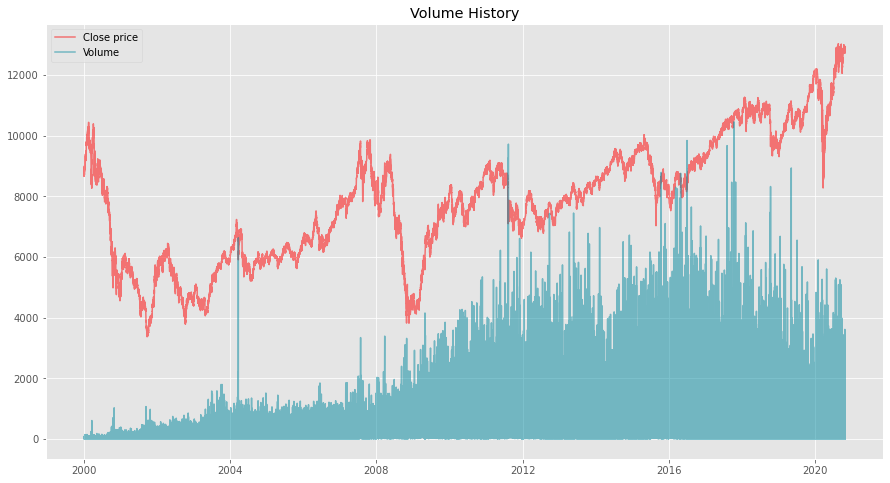

In [8]:
plt.figure(figsize = (15,8))
plt.plot(data.Close, color = 'red', alpha = 0.5, label = 'Close price') #把每分鐘的收盤價畫出來
plt.plot(data.Volume, color = '#01889f', alpha = 0.5, label = 'Volume') #成交量
plt.legend(loc = 'upper left')
plt.title('Volume History')

In [15]:
test_data = data[(data.index >= '2017-05-01 00:00:00')].copy()  #切在夜盤時間點之後
Morning = data[(data.Hour >= 8) & (data.Hour <= 13)] #切分日盤、夜盤
Night = data[(data.Hour < 8) | (data.Hour > 14)]

Text(0.5, 1.0, 'Volume of each hours')

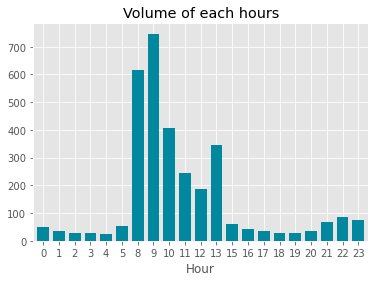

In [12]:
test_data.groupby(['Hour']).Volume.mean().plot(kind= 'bar', width = 0.75, color = '#01889f') #每天每小時成交量的平均值
plt.xticks(rotation = 0)
plt.title('Volume of each hours')

In [14]:
Morning

,Open,High,Low,Close,Volume,Year,Month,Weekday,Hour
2000-01-04 09:01:00,8688.0,8688.0,8676.0,8680.0,67,2000,1,2,9
2000-01-04 09:02:00,8662.0,8698.0,8662.0,8698.0,52,2000,1,2,9
2000-01-04 09:03:00,8698.0,8700.0,8690.0,8700.0,31,2000,1,2,9
2000-01-04 09:04:00,8700.0,8700.0,8680.0,8700.0,38,2000,1,2,9
2000-01-04 09:05:00,8700.0,8700.0,8652.0,8680.0,44,2000,1,2,9
...,...,...,...,...,...,...,...,...,...
2020-10-23 13:41:00,12833.0,12834.0,12832.0,12833.0,140,2020,10,5,13
2020-10-23 13:42:00,12833.0,12835.0,12833.0,12833.0,146,2020,10,5,13
2020-10-23 13:43:00,12833.0,12837.0,12833.0,12836.0,303,2020,10,5,13
2020-10-23 13:44:00,12837.0,12838.0,12836.0,12836.0,218,2020,10,5,13


In [16]:
Night

,Open,High,Low,Close,Volume,Year,Month,Weekday,Hour
2017-05-15 15:01:00,10023.0,10030.0,10023.0,10028.0,168,2017,5,1,15
2017-05-15 15:02:00,10028.0,10033.0,10028.0,10033.0,64,2017,5,1,15
2017-05-15 15:03:00,10033.0,10033.0,10032.0,10032.0,28,2017,5,1,15
2017-05-15 15:04:00,10032.0,10032.0,10031.0,10031.0,11,2017,5,1,15
2017-05-15 15:05:00,10031.0,10031.0,10020.0,10025.0,67,2017,5,1,15
...,...,...,...,...,...,...,...,...,...
2020-10-24 04:56:00,12860.0,12863.0,12860.0,12862.0,29,2020,10,6,4
2020-10-24 04:57:00,12862.0,12862.0,12858.0,12862.0,25,2020,10,6,4
2020-10-24 04:58:00,12861.0,12862.0,12859.0,12862.0,17,2020,10,6,4
2020-10-24 04:59:00,12862.0,12864.0,12860.0,12862.0,30,2020,10,6,4


# # Part II. 外資期貨未平倉簡易波段策略

In [18]:
FOI = pd.read_csv('Foreign_OI.txt')
FOI.head()

,Unnamed: 0,Date,Foreign_OI
0,0,2010/1/4,2645.0
1,1,2010/1/5,2356.0
2,2,2010/1/6,3990.0
3,3,2010/1/7,-3326.0
4,4,2010/1/8,-4730.0


In [19]:
FOI.index = pd.to_datetime(FOI.Date) #轉成datetime格式並設成index
FOI = FOI.drop(columns = ['Unnamed: 0','Date']) #丟掉
FOI

,Foreign_OI
Date,
2010-01-04,2645.0
2010-01-05,2356.0
2010-01-06,3990.0
2010-01-07,-3326.0
2010-01-08,-4730.0
...,...
2021-04-23,-29457.0
2021-04-26,-30486.0
2021-04-27,-31451.0


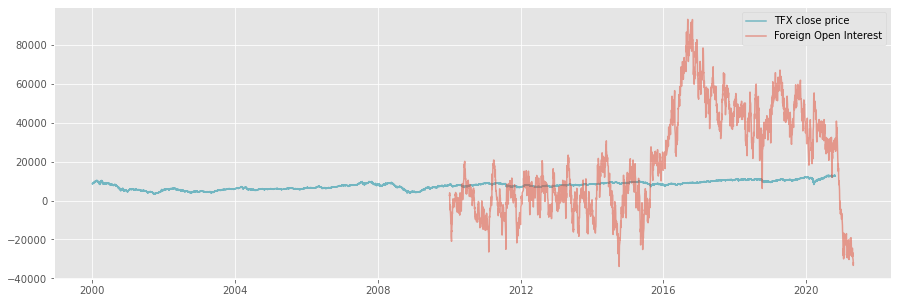

In [20]:
plt.figure(figsize = (15,5))
plt.plot(data.Close, color = '#01889f', alpha = 0.5, label = 'TFX close price') #台指期收盤價
plt.plot(FOI.Foreign_OI, alpha = 0.5, label = 'Foreign Open Interest') #外資未平倉量
plt.legend()
#兩個數據值範圍有差，讓台指期看起來很像直線；時間點x軸也不一樣

In [21]:
df = pd.concat([data.Close, FOI.Foreign_OI], axis = 1, join = 'inner') #為了解決上述問題，把兩個資料併在一起，變成同一個dataframe #axis = 1 資料橫著併 
df  #join = 'inner' 把它們沒有match到的時間點丟掉(NA值)
#用分鐘的資料併日單位的資料，因此CLOSE不會是每天的收盤價

,Close,Foreign_OI
2017-05-18,9940.0,63351.0
2017-05-19,9942.0,59541.0
2017-05-23,9981.0,61695.0
2017-05-24,10006.0,62798.0
2017-05-25,10028.0,68817.0
...,...,...
2020-10-16,12797.0,28745.0
2020-10-20,12887.0,26384.0
2020-10-21,12875.0,27466.0
2020-10-22,12788.0,31361.0


In [22]:
#把分K轉成日K資料
#data.columns  ### ['Open', 'High', 'Low', 'Close', 'Volume', 'Year', 'Month', 'Weekday','Hour']
data = data.drop(columns = ['Year', 'Month', 'Weekday','Hour'])
data = data.resample('1d').agg(dict(zip(data.columns, ['first','max','min','last','sum'])))
data

,Open,High,Low,Close,Volume
2000-01-04,8688.0,8939.0,8650.0,8843.0,2800
2000-01-05,8718.0,8870.0,8671.0,8810.0,2854
2000-01-06,8840.0,9005.0,8820.0,8850.0,2501
2000-01-07,8781.0,8870.0,8711.0,8829.0,2409
2000-01-08,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...
2020-10-20,12888.0,12905.0,12813.0,12872.0,95118
2020-10-21,12873.0,12946.0,12758.0,12787.0,96558
2020-10-22,12787.0,12894.0,12707.0,12861.0,138829
2020-10-23,12860.0,12884.0,12795.0,12846.0,100541


In [23]:
df = pd.concat([data.Close, FOI.Foreign_OI], axis = 1, join = 'inner')
df

,Close,Foreign_OI
2010-01-04,8166.0,2645.0
2010-01-05,8178.0,2356.0
2010-01-06,8320.0,3990.0
2010-01-07,8259.0,-3326.0
2010-01-08,8278.0,-4730.0
...,...,...
2020-10-19,12888.0,28769.0
2020-10-20,12872.0,26384.0
2020-10-21,12787.0,27466.0
2020-10-22,12861.0,31361.0


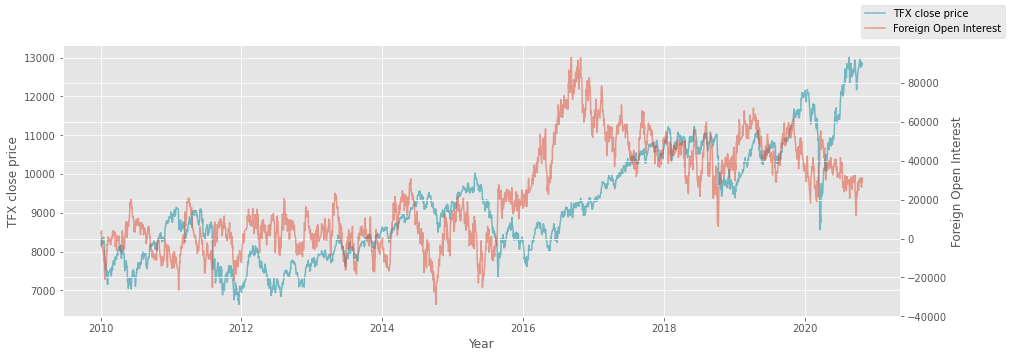

In [42]:
#把圖設兩個Y軸(一個在左邊、一個右邊)
fig, ax1 = plt.subplots(figsize = (15,5))
ax1.plot(df.Close.dropna(), color = '#01889f', alpha = 0.5, label = 'TFX close price')
ax2 = ax1.twinx() #把ax2的Y軸轉到右邊(具有共同 X 軸但不同 Y 軸的圖使用 twinx())
ax2.plot(df.Foreign_OI.dropna(), alpha = 0.5, label = 'Foreign Open Interest')
ax1.set_ylabel('TFX close price')
ax2.set_ylabel('Foreign Open Interest')
ax1.set_xlabel('Year')
fig.legend(loc = 'upper right') #legend把label顯示出來


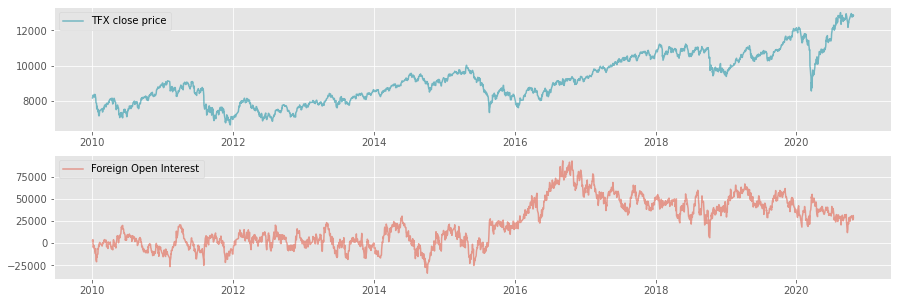

In [25]:
#第二個方法是把兩張圖壓扁一點
fig, (ax1, ax2) = plt.subplots(2, figsize = (15,5)) #放ax1、ax2兩張圖 ，subplots(2, )
ax1.plot(df.Close.dropna(), color = '#01889f', alpha = 0.5, label = 'TFX close price')
ax1.legend()
ax2.plot(df.Foreign_OI.dropna(), alpha = 0.5, label = 'Foreign Open Interest')
ax2.legend(loc = 'upper left')

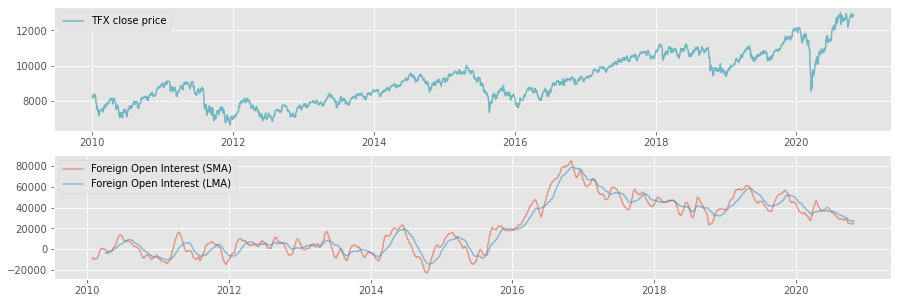

In [26]:
N1 = 20
N2 = 60
fig, (ax1, ax2) = plt.subplots(2, figsize = (15,5))
ax1.plot(df.Close.dropna(), color = '#01889f', alpha = 0.5, label = 'TFX close price')
ax1.legend()
ax2.plot(df.Foreign_OI.rolling(N1).mean().dropna(), alpha = 0.5, label = 'Foreign Open Interest (SMA)') #外資未平倉量的月線(20天)(短均線)
ax2.plot(df.Foreign_OI.rolling(N2).mean().dropna(), alpha = 0.5, label = 'Foreign Open Interest (LMA)') #外資未平倉量的季均線(長均線)
ax2.legend(loc = 'upper left')

## 回測

In [28]:
N1 = 20
N2 = 60
df['SMA'] = df.Foreign_OI.rolling(N1).mean().dropna() #把NA值拿掉(會沒辦法計算績效)
df['LMA'] = df.Foreign_OI.rolling(N2).mean().dropna()

signal = np.where((df.SMA >= df.LMA), 1, -1) #當短天期均線在長天期均線之上，把它定義成1(做多)，其餘時課定義成-1
signal_df = pd.Series(signal, index = df.index) #把df.index(日期) 和 signal組成dataframe
signal_df

2010-01-04   -1
2010-01-05   -1
2010-01-06   -1
2010-01-07   -1
2010-01-08   -1
             ..
2020-10-19   -1
2020-10-20   -1
2020-10-21   -1
2020-10-22   -1
2020-10-23   -1
Length: 2661, dtype: int32

In [31]:
signal

array([-1, -1, -1, ..., -1, -1, -1])

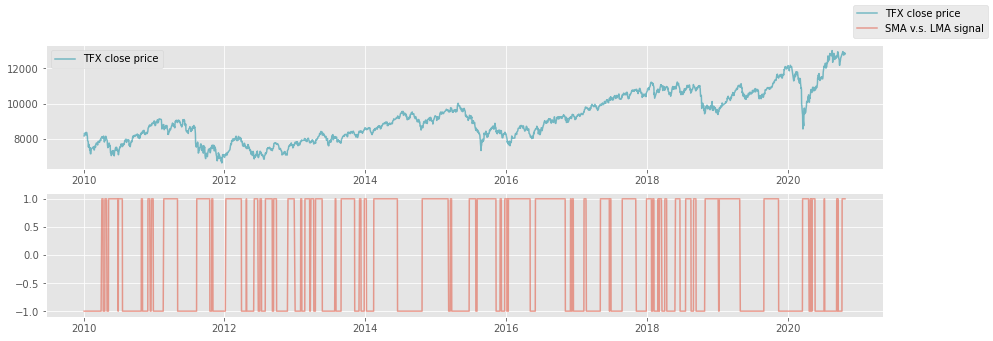

In [45]:
fig, (ax1, ax2) = plt.subplots(2, figsize = (15,5))
ax1.plot(df.Close.dropna(), color = '#01889f', alpha = 0.5, label = 'TFX close price') #第一個軸畫收盤價
ax2.plot(signal_df.dropna(), alpha = 0.5, label = 'SMA v.s. LMA signal') #第二個軸畫做多做空的策略訊號
fig.legend()
ax1.legend()

In [47]:
return_df = pd.concat([df.Close.pct_change(), signal_df.shift(2)], axis = 1).dropna() #Signal跟每天的收盤價併成一個dataframe
return_df

,Close,0
2010-01-06,0.017364,-1.0
2010-01-07,-0.007332,-1.0
2010-01-08,0.002301,-1.0
2010-01-11,0.005678,-1.0
2010-01-12,-0.002042,-1.0
...,...,...
2020-10-19,0.010903,1.0
2020-10-20,-0.001241,1.0
2020-10-21,-0.006603,1.0
2020-10-22,0.005787,1.0


In [48]:
return_df = pd.concat([df.Close.pct_change(), signal_df.shift(2)], axis = 1).dropna() #Signal跟每天的收盤價併成一個dataframe
# Close.pct_change() 是用close每天的變動率去算報酬 
#外資未平倉量在每天結束之後才會知道，所以你隔天收盤才進場，因此要shift(2)，所以報酬率跟後兩天的一樣

return_df.columns = ['d_return','position']
return_df['return'] = return_df.d_return * return_df.position #報酬率的計算方式
return_df

,d_return,position,return
2010-01-06,0.017364,-1.0,-0.017364
2010-01-07,-0.007332,-1.0,0.007332
2010-01-08,0.002301,-1.0,-0.002301
2010-01-11,0.005678,-1.0,-0.005678
2010-01-12,-0.002042,-1.0,0.002042
...,...,...,...
2020-10-19,0.010903,1.0,0.010903
2020-10-20,-0.001241,1.0,-0.001241
2020-10-21,-0.006603,1.0,-0.006603
2020-10-22,0.005787,1.0,0.005787


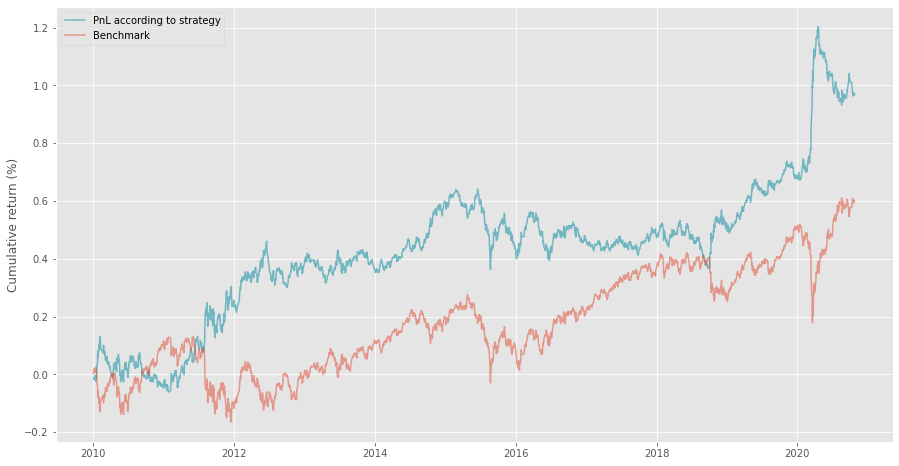

In [49]:
plt.figure(figsize = (15,8))
plt.plot(return_df['return'].dropna().cumsum(), alpha = 0.5, color = '#01889f', label = 'PnL according to strategy') #dropna()把NA拿掉；cumsum()獲利是累積的
plt.plot(df.Close.pct_change().dropna().cumsum(), alpha = 0.5, label = 'Benchmark') #單純一值持有台指期的績效(要贏過大盤)
plt.ylabel('Cumulative return (%)')
plt.legend()

In [33]:
#算出風暴比
MDD_series = return_df['return'].dropna().cumsum().cummax()-return_df['return'].dropna().cumsum() #之前累積下的最高點cumsum()- 減每天的變動率(知道今天距離上一次的高點有幾%)
MDD = max(MDD_series) #把最大值抓出來，就是最大虧損
Return_on_MDD = return_df['return'].dropna().cumsum()[-1] / MDD #把你賺的錢(cumsum()[-1]代表最後一個值)除以最大虧損
Return_on_MDD

2.286836596190533

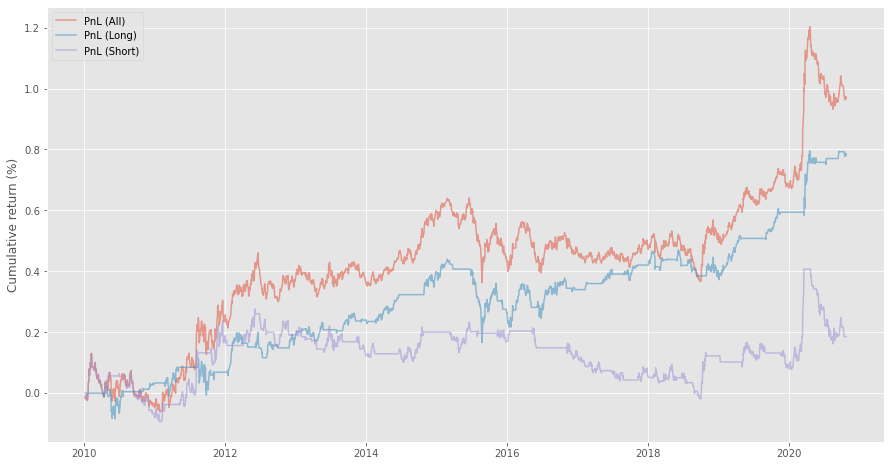

In [51]:
#把多空單拆開來做
signal_df_long = pd.Series(np.where(signal_df == 1, 1, 0), index = signal_df.index) #只保留1的部分
signal_df_short = pd.Series(np.where(signal_df == -1, -1, 0), index = signal_df.index) #只保留-1的部分(signal_df == -1, -1, 0):-1的部分保持-1，其它為0

return_df = pd.concat([df.Close.pct_change(), signal_df.shift(2), signal_df_long.shift(2), signal_df_short.shift(2)], axis = 1).dropna()
return_df.columns = ['d_return','position_all','position_long','position_short']
return_df['return_all'] = return_df.d_return * return_df.position_all
return_df['return_long'] = return_df.d_return * return_df.position_long
return_df['return_short'] = return_df.d_return * return_df.position_short
plt.figure(figsize = (15,8))
plt.plot(return_df['return_all'].dropna().cumsum(), alpha = 0.5, label = 'PnL (All)')
plt.plot(return_df['return_long'].dropna().cumsum(), alpha = 0.5, label = 'PnL (Long)')
plt.plot(return_df['return_short'].dropna().cumsum(), alpha = 0.5, label = 'PnL (Short)')
plt.ylabel('Cumulative return (%)')
plt.legend()

In [52]:
return_df

,d_return,position_all,position_long,position_short,return_all,return_long,return_short
2010-01-06,0.017364,-1.0,0.0,-1.0,-0.017364,0.000000,-0.017364
2010-01-07,-0.007332,-1.0,0.0,-1.0,0.007332,-0.000000,0.007332
2010-01-08,0.002301,-1.0,0.0,-1.0,-0.002301,0.000000,-0.002301
2010-01-11,0.005678,-1.0,0.0,-1.0,-0.005678,0.000000,-0.005678
2010-01-12,-0.002042,-1.0,0.0,-1.0,0.002042,-0.000000,0.002042
...,...,...,...,...,...,...,...
2020-10-19,0.010903,1.0,1.0,0.0,0.010903,0.010903,0.000000
2020-10-20,-0.001241,1.0,1.0,0.0,-0.001241,-0.001241,-0.000000
2020-10-21,-0.006603,1.0,1.0,0.0,-0.006603,-0.006603,-0.000000
2020-10-22,0.005787,1.0,1.0,0.0,0.005787,0.005787,0.000000


### 如何自己畫一個高原圖(像暴力演算法)

In [35]:
# Make the plot
x_sma = [] #短天期均線的參數
y_lma = [] #長天期均線的參數
z_RonMDD = [] #Z軸這邊用風暴比(也可以換sharp ratio等)

In [36]:
for i in range(5,45,5):  #短天期從5-45每5個數字一試
    for j in range(60,125,5): #長天期的範圍
        
        N1 = i
        N2 = j
        df['SMA'] = df.Foreign_OI.rolling(N1).mean().dropna()
        df['LMA'] = df.Foreign_OI.rolling(N2).mean().dropna()
        
        signal = np.where((df.SMA >= df.LMA), 1, -1)
        signal_df = pd.Series(signal, index = df.index)
        
        return_df = pd.concat([df.Close.pct_change(), signal_df.shift(2)], axis = 1).dropna()
        return_df.columns = ['d_return','position']
        return_df['return'] = return_df.d_return * return_df.position
        
        
        MDD_series = return_df['return'].dropna().cumsum().cummax()-return_df['return'].dropna().cumsum()
        MDD = max(MDD_series)
        Return_on_MDD = return_df['return'].dropna().cumsum()[-1] / MDD

        x_sma.append(i)
        y_lma.append(j)
        z_RonMDD.append(Return_on_MDD)
        #一個i、j的組合算一個風暴比塞回Z

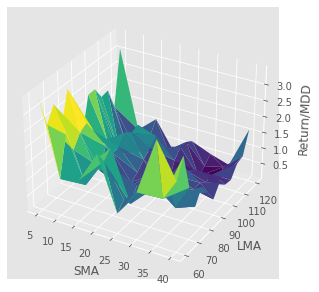

In [37]:
fig = plt.figure(figsize = (10,5))
ax = fig.gca(projection='3d')  #用成3D的圖
ax.plot_trisurf(x_sma, y_lma, z_RonMDD, cmap=plt.cm.viridis, linewidth=0.2)
ax.set_xlabel('SMA')
ax.set_ylabel('LMA')
ax.set_zlabel('Return/MDD')
plt.show()

Cumulative return: 97.06 %
MDD: 27.83 %
Return on MDD: 3.49


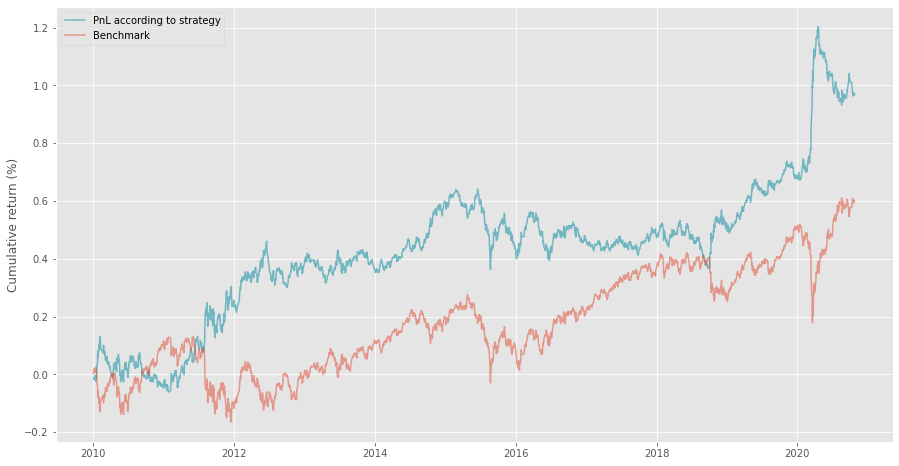

In [38]:
#改用 5、60分別為長短均線
N1 = 5
N2 = 60
df['SMA'] = df.Foreign_OI.rolling(N1).mean().dropna()
df['LMA'] = df.Foreign_OI.rolling(N2).mean().dropna()

signal = np.where((df.SMA >= df.LMA), 1, -1)
signal_df = pd.Series(signal, index = df.index)

return_df = pd.concat([df.Close.pct_change(), signal_df.shift(2)], axis = 1).dropna()
return_df.columns = ['d_return','position']
return_df['return'] = return_df.d_return * return_df.position
plt.figure(figsize = (15,8))
plt.plot(return_df['return'].dropna().cumsum(), alpha = 0.5, color = '#01889f', label = 'PnL according to strategy')
plt.plot(df.Close.pct_change().dropna().cumsum(), alpha = 0.5, label = 'Benchmark')
plt.ylabel('Cumulative return (%)')
plt.legend()

#算出風暴比
MDD_series = return_df['return'].dropna().cumsum().cummax()-return_df['return'].dropna().cumsum()
MDD = max(MDD_series)
Return_on_MDD = return_df['return'].dropna().cumsum()[-1] / MDD
Return_on_MDD

print('Cumulative return: {:.2f} %'.format(return_df['return'].dropna().cumsum()[-1]*100))
print('MDD: {:.2f} %'.format(max(MDD_series)*100))
print('Return on MDD: {:.2f}'.format(Return_on_MDD))
#OVER FITTING會讓你的績效看起來還不錯

## # Part III. Monte Carlo Simulation蒙地卡羅模擬

#### long signal : 48 %   short signal : 52 %
#### 為了怕是overfitting，因此用48%的時間隨機做多，52%做空，時間的分布是隨機的，並反覆大量測試

In [ ]:
def Monte_Carlo_Simulations(
    c_p: str,
    mu: float,
    sigma: float,
    s: float,
    k: float,
    r: float,
    t: float,
    n: int,
    m: int,
) 

In [39]:
#隨機在時間段塞48%的訊號是1，52%的時間是-1，重複做100次，再把剛剛的績效也畫上來(黑色粗的線)
Monte_Carlo_Simulation(100, 'PnL')

NameError: name 'Monte_Carlo_Simulation' is not defined

In [ ]:
#可以看出有overfitting(叫猴子來市場上亂做都可能比你好)，你的投資策略的線需要遠離大家